## Importing required libraries

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

## Downloading the dataset

In [4]:
df = pd.read_csv('rans_data.csv')

## Data exploration 

In [6]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149043 entries, 0 to 149042
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Time           149043 non-null  int64 
 1   Protcol        149043 non-null  object
 2   Flag           149043 non-null  object
 3   Family         149043 non-null  object
 4   Clusters       149043 non-null  int64 
 5   SeddAddress    149043 non-null  object
 6   ExpAddress     149043 non-null  object
 7   BTC            149043 non-null  int64 
 8   USD            149043 non-null  int64 
 9   Netflow_Bytes  149043 non-null  int64 
 10  IPaddress      149043 non-null  object
 11  Threats        149043 non-null  object
 12  Port           149043 non-null  int64 
 13  Prediction     149043 non-null  object
dtypes: int64(6), object(8)
memory usage: 15.9+ MB


Time             0
Protcol          0
Flag             0
Family           0
Clusters         0
SeddAddress      0
ExpAddress       0
BTC              0
USD              0
Netflow_Bytes    0
IPaddress        0
Threats          0
Port             0
Prediction       0
dtype: int64

## Visualization of Target Distribution

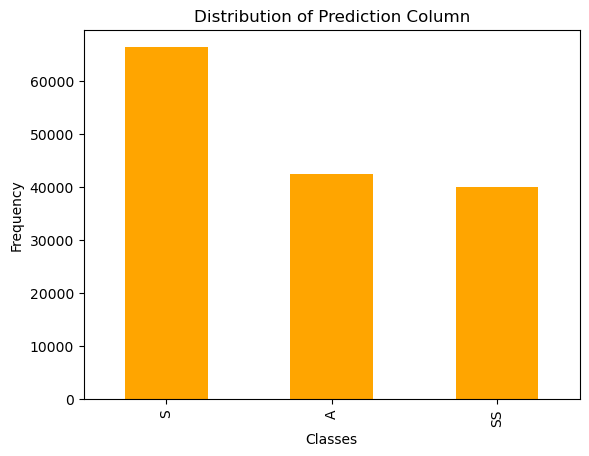

In [8]:
df['Prediction'].value_counts().plot(kind='bar', color='orange')
plt.title('Distribution of Prediction Column')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.show()

## Pair Plot of Features

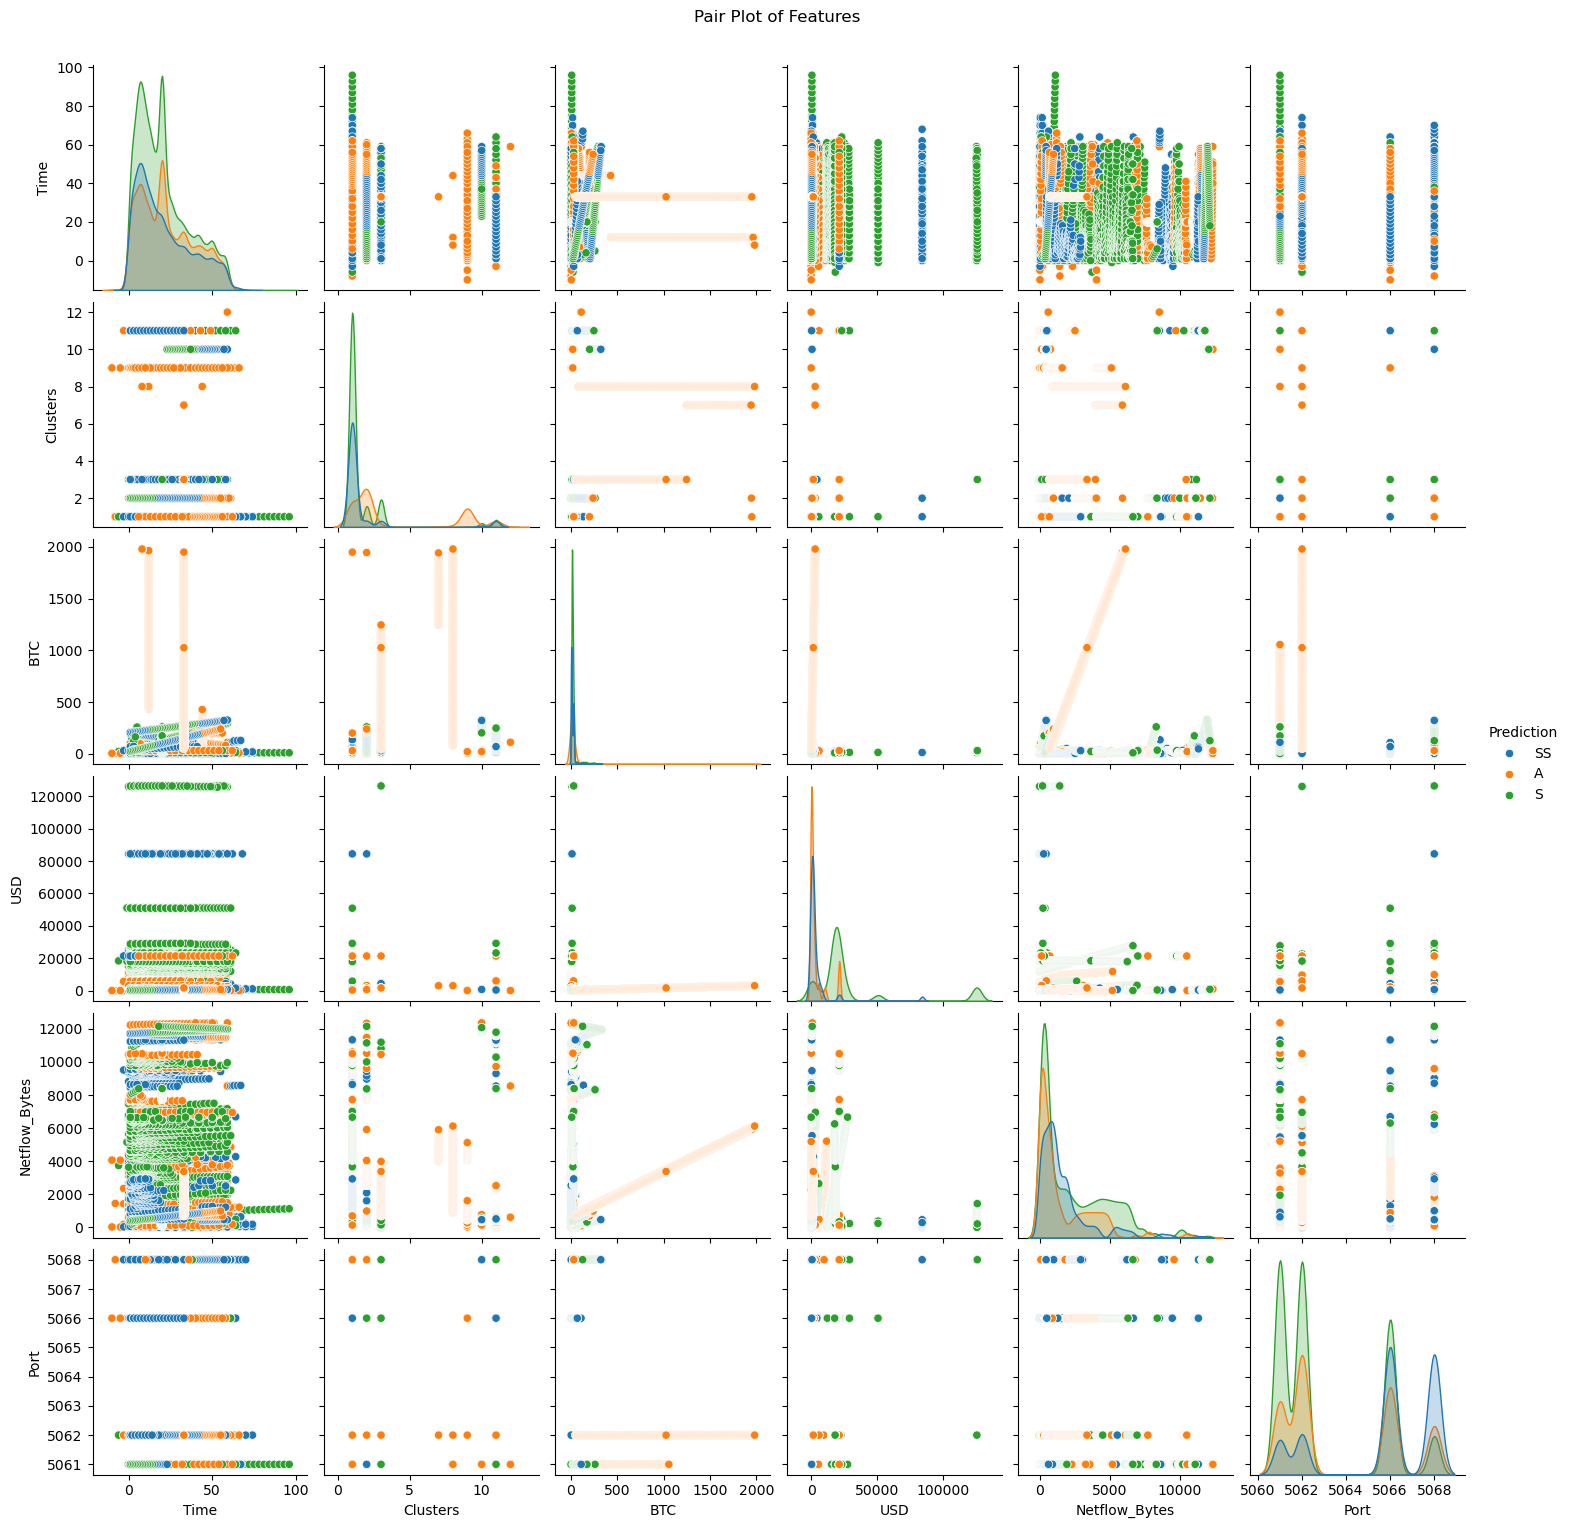

In [10]:
sns.pairplot(df, hue='Prediction', diag_kind='kde')
plt.suptitle('Pair Plot of Features', y= 1.02)
plt.show()

## Preprocessing: Handling Categorical Variables

In [12]:
from sklearn.preprocessing import LabelEncoder

categorical_col = df.select_dtypes(include=['object']).columns 
for col in categorical_col:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])

## Feature-Target Seperation

In [14]:
x_ideal = df.iloc[:, :-1]
y_ideal = df.iloc[:, -1]

print(x_ideal.shape)
print(y_ideal.shape)

(149043, 13)
(149043,)


## Train-CV-Test Split

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_, y_train, y_ = train_test_split(x_ideal, y_ideal, test_size=0.30, random_state=1)
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

print(x_train.shape, y_train.shape)
print(x_cv.shape, y_cv.shape)
print(x_test.shape, y_test.shape)

(104330, 13) (104330,)
(22356, 13) (22356,)
(22357, 13) (22357,)


## Feature Scaling

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_cv = scaler.transform(x_cv)
x_test = scaler.transform(x_test)

## Model Building

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

model = tf.keras.models.Sequential([
    Input(shape=(x_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='linear'),
])

## Model Compilation

In [22]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,227 (47.76 KB)

 Trainable params: 12,227 (47.76 KB)

 Non-trainable params: 0 (0.00 B)

None


## Model Training

In [24]:
history = model.fit(x_train, y_train, validation_data=(x_cv, y_cv), epochs=50, batch_size=32)

Epoch 1/50
3261/3261 ━━━━━━━━━━━━━━━━━━━━ 2s 333us/step - loss: 0.3774 - val_loss: 0.1280
Epoch 2/50
3261/3261 ━━━━━━━━━━━━━━━━━━━━ 1s 337us/step - loss: 0.1259 - val_loss: 0.1062
Epoch 3/50
3261/3261 ━━━━━━━━━━━━━━━━━━━━ 1s 321us/step - loss: 0.1028 - val_loss: 0.0893
Epoch 4/50
3261/3261 ━━━━━━━━━━━━━━━━━━━━ 1s 320us/step - loss: 0.0944 - val_loss: 0.0891
Epoch 5/50
3261/3261 ━━━━━━━━━━━━━━━━━━━━ 1s 334us/step - loss: 0.0865 - val_loss: 0.0772
Epoch 6/50
3261/3261 ━━━━━━━━━━━━━━━━━━━━ 1s 338us/step - loss: 0.0809 - val_loss: 0.0759
Epoch 7/50
3261/3261 ━━━━━━━━━━━━━━━━━━━━ 1s 326us/step - loss: 0.0774 - val_loss: 0.0712
Epoch 8/50
3261/3261 ━━━━━━━━━━━━━━━━━━━━ 1s 382us/step - loss: 0.0717 - val_loss: 0.0686
Epoch 9/50
3261/3261 ━━━━━━━━━━━━━━━━━━━━ 1s 343us/step - loss: 0.0673 - val_loss: 0.0626
Epoch 10/50
3261/3261 ━━━━━━━━━━━━━━━━━━━━ 1s 321us/step - loss: 0.0656 - val_loss: 0.0643
Epoch 11/50
3261/3261 ━━━━━━━━━━━━━━━━━━━━ 1s 314us/step - loss: 0.0619 - val_loss: 0.0570
Epoch 12

## Model Evaluation

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred_logits = model.predict(x_test)
y_pred = tf.argmax(y_pred_logits, axis=1).numpy()

test_accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print(f"Test Set Accuracy: {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Confusion Matrix:\n{cm}")

699/699 ━━━━━━━━━━━━━━━━━━━━ 0s 219us/step
Test Set Accuracy: 0.9835
Precision: 0.9835
Recall: 0.9835
F1 Score: 0.9835
Confusion Matrix:
[[6305   87   25]
 [ 136 9706   37]
 [  49   36 5976]]


## Confusion Matrix Visualization

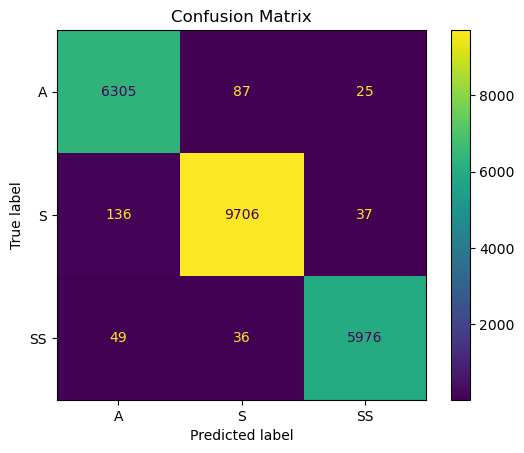

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= ['A', 'S', 'SS'])
cm_display.plot()
plt.title('Confusion Matrix')
plt.show()

## Plotting Training and Validation Loss

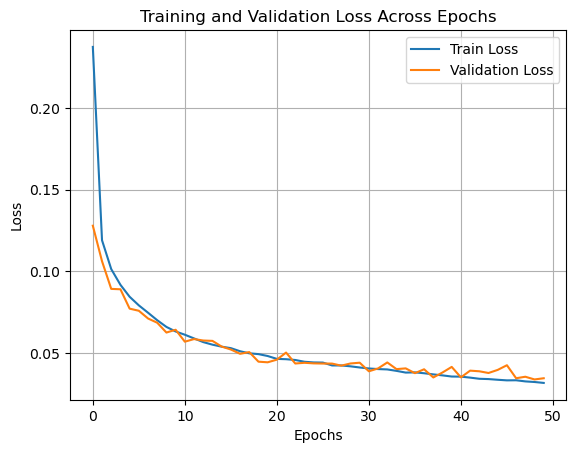

In [30]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Across Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()